## Исследование данных о российском кинопрокате



вступление:в данном проекте я собираюсь переработать данные, т.е убрать или заполнить пропуски,удалить дубликаты, проверить данные на наличие различных аномалий. Затем на основе уже исправленных данных провести исследование в котором я посмотрю сколько фильмов выходило в прокат каждый год,изучю как менялась динамика проката по годам,с помощью сводной таблицы посчитаю среднюю и медианную сумму сборов для каждого года,Определю влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. и на последок исследую фильмы получившие государственную поддержку на предмет самого популярного жанра,рейтинга жанра фильмов ,возврата вложеных средств в жанр фильмов и окупаемости. После всех проведенных действий напишу вывод в ккоторм кратко опишу все действия которые делал с данными. По хаду проекта собираюсь оставлять промежуточные выводы по проведенным ранее действиям, а именно результат этих действий.

по вводным данным у нас есть две таблицы, которые мы обьединим в одну.

1 табица под названием "mkrf_movies" содержит колонки:

title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.

и во 2 таблице под названием "" содержатсЯ колонки:

puNumber — номер прокатного удостоверения;
box_office — сборы в рублях

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/mkrf_movies.csv')
data_1 = pd.read_csv('/datasets/mkrf_shows.csv')
data_1['puNumber']=data_1['puNumber'].astype('float')
data['puNumber']=data['puNumber'].drop(labels = [1797])
data['puNumber']=data['puNumber'].astype('float')
data=data.merge(data_1,how='left',on='puNumber')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

вывод:обьединили 2 таблицы в одну и увидили,что есть данные которые должны принадлежать иному типу данных нежели object.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [2]:
data['show_start_date']=pd.to_datetime(data['show_start_date'])

invalid_raitings = data[data['ratings'].str.contains('[^0-9.]').fillna(False)]

data.loc[invalid_raitings.index, 'ratings'] = invalid_raitings['ratings'].str[0] + '.' + invalid_raitings['ratings'].str[1]

data['ratings'] = pd.to_numeric(data['ratings'])

data['ratings'].describe()[['min', 'max']]


min    1.0
max    9.9
Name: ratings, dtype: float64

вывод:преоброзовали 'show_start_date' из object в datetime, также привели к общему виду значения в столбце 'ratings' и проверили чтобы небыло аномальных значений,и поменяли тип данных на float.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [3]:
pd.options.mode.use_inf_as_na = True
data['film_studio'] = data['film_studio'].fillna('NoName')
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['financing_source']=data['financing_source'].fillna('стороннее финансирование')
data['box_office'] = data['box_office'].fillna(data['box_office'].mean()).astype('int')
data.isna().sum()

title                      0
puNumber                   1
show_start_date            0
type                       0
film_studio                0
production_country         2
director                   9
producer                 568
age_restriction            0
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
ratings                  967
genres                   976
box_office                 0
dtype: int64

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

вывод:заполнили пропуски, там где это возможно.
изменили типы данных для удобств чтения и работы с ними.

'film_studio'- был заполнен как noname так как, если студия не указала свое назвние, то скорее всего у нее нету названия, но может и оказаться, что данные были прождены в ходе каких дибо манипуляций с ними.

'refundable_support'- пропуски были заполнены 0 поскольку, если вданной колонке нет данных, то скорее всего государство не подердживало фильм,как следствие объём возвратных средств государственной поддержки равен 0

'nonrefundable_support'-пропуски были заполнены 0 поскольку, если в данной колонке нет данных, то скорее всего государство не подердживало фильм,как следствие объём не возвратных средств государственной поддержки равен 0

'budget'-пропуски были заполнены 0 поскольку, если в данной колонке нет данных, то скорее всего государство не подердживало фильм либо, если государство поддержало фильм, но значения куда то пропали 0 в будующем поможет нам определить фильм с таким пропуском

'financing_source'-пропуски были заполнены 'стороннее финансирование' поскольку, если в данной колонке нет данных, то скорее всего фильм финансировался не государством

'box_office'- пропуски были заполнены средним занчением по скольку, если в данно колонке нет данных, то это ошибка в сборе данных либо в ходе манипуляций с данными. В то, что у фильма нет сборов мне слабо верится, так как создатели фильмов так или иначе хотят отбить затраченные на них силы и время. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [4]:
data['title'] = data['title'].str.lower()
data.duplicated().sum()
data.nunique()

title                    6762
puNumber                 7483
show_start_date          1965
type                        8
film_studio              5491
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    84
genres                    742
box_office               2939
dtype: int64

In [5]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310.0,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,стороннее финансирование,7.0,"мелодрама,комедия",76478696
4639,иоанна - женщина на папском престоле /по роман...,221154310.0,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,стороннее финансирование,7.6,"драма,мелодрама,история",76478696
5067,анализируй это!,221054410.0,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,стороннее финансирование,7.4,"комедия,криминал",76478696
5068,анализируй то!,221054410.0,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,стороннее финансирование,6.8,"комедия,криминал",76478696


вывод: дубликаты есть! 
если судить по колонке 'puNumber', то есть два не явных дубликата.
скорее всего они появились в результате того, что по ошибке фильму присвоили одно и тоже прокатное удоставерение. Мне кажется, что тут сыграл человеческий фактор.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [6]:
for column in ['director', 'producer', 'film_studio', 'production_country', 'genres']:

    data[column] = data[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
data['type'] = data['type'].str.strip()
data['type'].unique()
data[column]

0          боевик, драма, мелодрама
1                    драма, военный
2       фантастика, боевик, триллер
3       фантастика, боевик, триллер
4       фантастика, боевик, триллер
                   ...             
7481                            NaN
7482                боевик, триллер
7483                            NaN
7484                            NaN
7485               комедия, вестерн
Name: genres, Length: 7486, dtype: object

вывод:Убрали лишние пробелы между списками внутри ячейки.Избавились от неявных дубликатов, связанных с порядком значений. 
испраили проблемные значения в 'type'

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [7]:
invalid_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
invalid_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.0,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016
2058,дуxless 2,111000415.0,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511
2472,воин (2015),111017315.0,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик, драма, криминал",196572438
2532,бармен.,111009615.0,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия, фэнтези",67418974
2615,савва. сердце воина,114001715.0,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм, приключения, фэнтези",184487551
2684,тряпичный союз,111010215.0,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия, драма",1957738
2788,срочно выйду замуж,111017115.0,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия, мелодрама",72937783
2874,помню - не помню!,111004916.0,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,15362931
3047,любовь с ограничениями,111008216.0,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия, мелодрама",70299052
3565,притяжение (2016),111018116.0,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1038321489


вывод:Есть ряд фильмов, которые получали господдержку, но в бюджете стоит 0.
Выяснили в каком объёме обычно оказывалась поддержка и заменили средним процентом от поддержки.
Суммирували оба вида господдержки.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [8]:
data['year']=data['show_start_date'].dt.year
data['year']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: year, Length: 7486, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [9]:
def row(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(', ')[0])
    return data
data = row(data, ['director', 'genres'])
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,7.2,"боевик, драма, мелодрама",76478696,2015,Кевин Костнер,боевик
1,особо важное задание,111013716.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,стороннее финансирование,6.6,"драма, военный",76478696,2016,Е.Матвеев,драма
2,особо опасен,221038416.0,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,6.8,"фантастика, боевик, триллер",76478696,2016,Тимур Бекмамбетов,фантастика
3,особо опасен,221026916.0,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,6.8,"фантастика, боевик, триллер",76478696,2016,Тимур Бекмамбетов,фантастика
4,особо опасен,221030815.0,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,6.8,"фантастика, боевик, триллер",76478696,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,сад художника: американский импрессионизм,126008019.0,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,стороннее финансирование,NaN,NaN,76478696,2019,Фил Грабски,NaN
7482,звериная ярость,121037819.0,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,стороннее финансирование,5.4,"боевик, триллер",76478696,2019,Ник Пауэлл,боевик
7483,щенячий патруль: скорей спешим на помощь!,124010819.0,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,стороннее финансирование,NaN,NaN,76478696,2019,Чарльз Е.Бастьен,NaN
7484,"машины песенки. серия ""испанские мотивы""",124010619.0,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,стороннее финансирование,NaN,NaN,76478696,2019,А.Беляев,NaN


In [20]:
data['director'].str.split(', ').str[0]

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
3       Тимур Бекмамбетов
4       Тимур Бекмамбетов
              ...        
7481          Фил Грабски
7482           Ник Пауэлл
7483     Чарльз Е.Бастьен
7484             А.Беляев
7485             И.Трусов
Name: director, Length: 7486, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [10]:
data['support_percentage'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

support_percentage = data['support_percentage'].median()
support_percentage_percent="{:.0%}".format(support_percentage)
support_percentage_percent=f"{support_percentage:.0%}"
print('Чаще всего доля участия государства в бюджете составляет:', support_percentage_percent)

data.loc[invalid_budget.index, 'budget'] = (data.loc[invalid_budget.index, 'refundable_support'] + data.loc[invalid_budget.index, 'nonrefundable_support']) / support_percentage

data.loc[invalid_budget.index]


Чаще всего доля участия государства в бюджете составляет: 59%


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_percentage
2053,14+,111023614.0,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,3.883400e+07,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016,2014,А.Зайцев,мелодрама,NaN
2058,дуxless 2,111000415.0,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,1.266326e+08,Фонд кино,6.6,драма,446163511,2015,Р.Прыгунов,драма,NaN
2472,воин (2015),111017315.0,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,1.350748e+08,Фонд кино,7.8,"боевик, драма, криминал",196572438,2015,А.Андрианов,боевик,NaN
2532,бармен.,111009615.0,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,3.376869e+07,Фонд кино,6.2,"комедия, фэнтези",67418974,2015,Д.Штурманова,комедия,NaN
2615,савва. сердце воина,114001715.0,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,2.701495e+08,Фонд кино,4.6,"мультфильм, приключения, фэнтези",184487551,2015,М.Фадеев,мультфильм,NaN
2684,тряпичный союз,111010215.0,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,9.961765e+07,Фонд кино,6.3,"комедия, драма",1957738,2015,М.Местецкий,комедия,NaN
2788,срочно выйду замуж,111017115.0,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,5.909521e+07,Фонд кино,5.1,"комедия, мелодрама",72937783,2015,С Чекалов,комедия,NaN
2874,помню - не помню!,111004916.0,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,1.013061e+07,Министерство культуры,4.3,комедия,15362931,2016,В.Ровенский,комедия,NaN
3047,любовь с ограничениями,111008216.0,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,1.181904e+08,Фонд кино,6.3,"комедия, мелодрама",70299052,2016,Д.Тюрин,комедия,NaN
3565,притяжение (2016),111018116.0,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,4.221087e+08,Фонд кино,5.6,фантастика,1038321489,2016,Ф.Бондарчук,фантастика,NaN


вывод:добавли столбец с годом проката фильма, создали два столбца с именем и фамилией главного режиссёра и основным жанром фильма.
посчитали какую долю от общего бюджета фильма составляет государственная поддержка.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Доля фильмов, для которых есть информация о сборах: 1.00


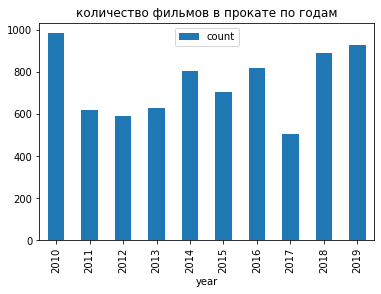

In [11]:
data_pivot = data.loc[data['box_office'].notna(), ['year', 'box_office']].groupby('year').agg(['count', 'sum', 'mean','median'])

data_pivot.columns = data_pivot.columns.get_level_values(1)

data_pivot.plot(title='количество фильмов в прокате по годам', kind='bar', y='count')
print(f'Доля фильмов, для которых есть информация о сборах: {data.box_office.notna().mean():.2f}')

вывод: Доля фильмов, для которых есть информация о сборах равна 100% по скольку ранее этот параметр был заполнен средними значениями.
также исходя из графика фильмы очень активно выходили в 2010,2018 и 2019 годах, а вот в 2017 году был сильный спад по количеству фильмов вышедших в прокат.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

В 2013 году сумма сборов была минимальной, в 2018 максимальной.


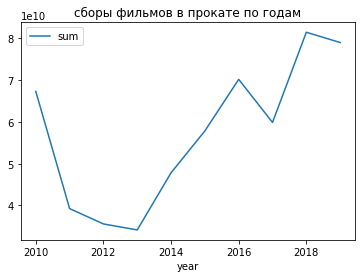

In [12]:
data_pivot.plot(title='сборы фильмов в прокате по годам', kind='line', y='sum')
print(f"В {data_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {data_pivot['sum'].idxmax()} максимальной.")

вывод:В 2013 году сумма сборов была минимальной, в 2018 максимальной. НО важно отметить, что хоть в 2017 был сильный спад по выходу фильмов в прокат, но тем неменее сборы были на уровне, относительно вышедших фильмов.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

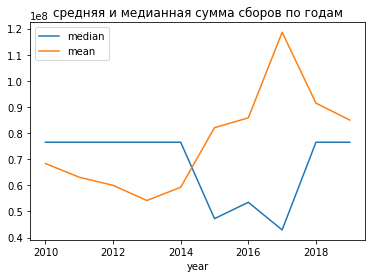

In [13]:
data_pivot.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'])
print()

вывод:из графика видно, что средняя и мнедианные суммы очнь сильно отлечаются.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:title={'center':'сумма сборов по годам с разбивкой по возрастным категориям'}, xlabel='year'>

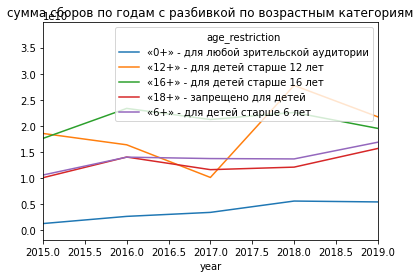

In [14]:
data[data['box_office'].notna()].pivot_table(index='year',columns='age_restriction',values='box_office',aggfunc='sum') \
.plot(title='сумма сборов по годам с разбивкой по возрастным категориям', kind='line', xlim=[2015, 2019])

вывод:возростное ограничение однозначно влияет, но от года к году оно меняется не осбо сильно (2017 год не берем так как он сам по себе был давольно скуден на прокатные фильмы). Фильмы стабильно соберающие год от года самые большие кассовые сборы являются фильмы категории 16+. Но в 2018 произошол резкий скачек фильмов с категорией 12+, скорее всего это связанно  стем, что в 2017 году в прокат вышло слишком мало фильмов с данным рейтингом в результате чего был большой спрос, но мало предложений и люди хотели сходить с детьми в кино с детьми, но сеансов было мало по этому не могли.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [15]:
data_support = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()]

data_support['full_support'] = data_support['nonrefundable_support'] + data_support['refundable_support']

data_support['profitability'] = data_support['box_office'] / data_support['full_support'] - 1

data_support['is_paid_off'] = data_support['profitability'] > 0

data_support['is_not_paid_off'] = ~data_support['is_paid_off']



<AxesSubplot:title={'center':'средняя оценка фильмов по жанрам'}, xlabel='main_genres'>

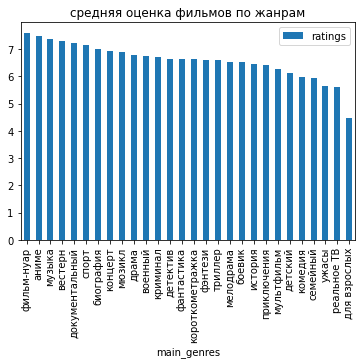

In [16]:
data_support[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='средняя оценка фильмов по жанрам', kind='bar')

вывод:создали вспомогательную таблицу data_support, посторили график средней оценки фильмов по жанрам. 
По графику видно, что самый высокий рейтин у фильмов в категории 'нуар', а самый низкий в категории 'для взрослых'.

<AxesSubplot:title={'center':'количество фильмов, получивших господдержку (по жанрам)'}>

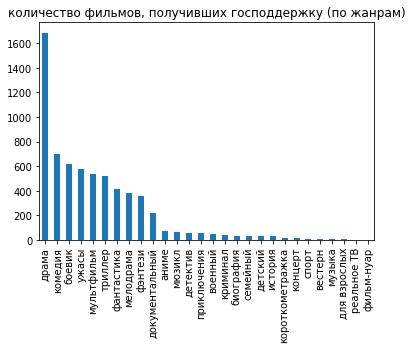

In [17]:
data_support['main_genres'].value_counts()\
.plot(title='количество фильмов, получивших господдержку (по жанрам)', kind='bar')

вывод:господдержку получают чаще всего фильмы в категории драма.
'фильм-нуар' и 'реальное тв 'вообще не полуают господдержку.

<AxesSubplot:title={'center':'количество окупившихся и не окупившихся фильмов'}, xlabel='main_genres'>

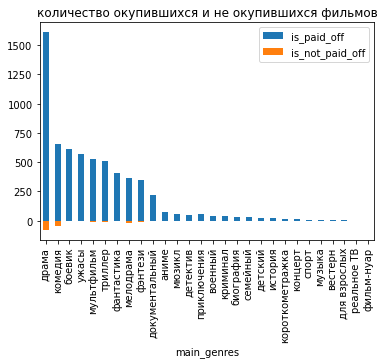

In [18]:

data_support.groupby('main_genres') \
            .agg({'title': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='количество окупившихся и не окупившихся фильмов',
                  kind='bar',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'])

выввод:большая часть фильмов получивших господдрежку окупились

<AxesSubplot:title={'center':'объём государственной поддержки'}, xlabel='main_genres'>

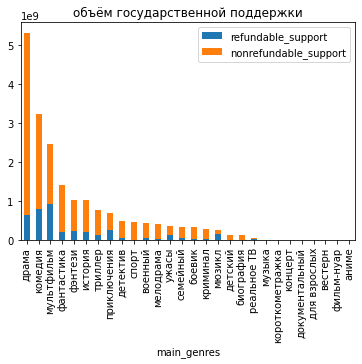

In [21]:
data_support.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='объём государственной поддержки',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'])

вывод:обьем невозвратных государственных средств намного выше обьема возвратных средств, что достаточно странно,ведь по статистике большая часть фильмов окупается.

### Шаг 5. Напишите общий вывод

были обьедены 2 таблицы в одну, заполненны пропуски там где это возможно.Убраны лишние пробелы между списками внутри ячеек.Избавились от неявных дубликатов, связанных с порядком значений. испраили проблемные значения в 'type'.
Выяснины в каком объёме обычно оказывалась поддержка и заменили средним процентом от поддержки.
Суммирували оба вида господдержки.добавлены столбци с годом проката фильма, именем и фамилией главного режиссёра и основным жанром фильма. посчитано какую долю от общего бюджета фильма составляет государственная поддержка.проанализировано количество фильмов вышедших в прокат с 2015 по 2019 год, сборы фильмов в прокате. были посчитаны средние и медианные значения сборов.Исследовали как влияет возрастная категория фильма на его кассавые сборы вв прокате. проанализированны рейтинги фильмов по жанрам,количество фильмов получивших господдрежку, количество фильмов окупившихся в прокате и вернувших средства обратно в козну государства.